In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy.optimize as opt

In [94]:
data = sc.loadmat('ex3data1')
X = data['X']
y = data['y']

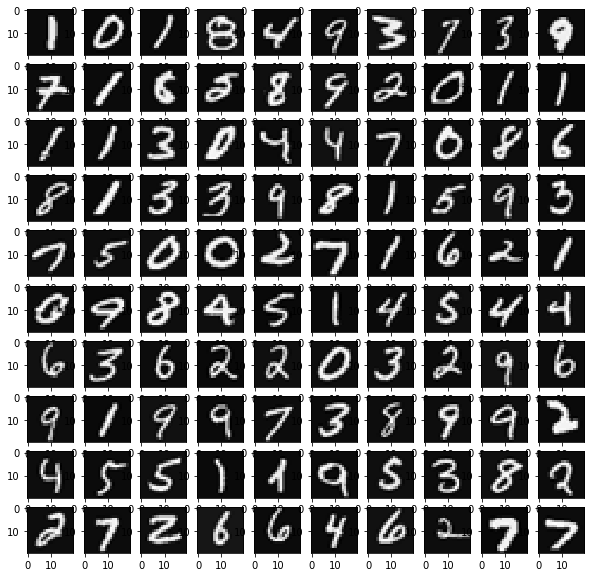

In [95]:
%matplotlib inline
fig , axarr = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        mat = X[np.random.randint(X.shape[0]),:].reshape((20,20),order = 'F')
        axarr[i,j].imshow(mat,cmap = 'gray')

### Sigmoid Function

In [96]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Cost Function

In [97]:
def costfunction(theta,X,y,l):
    m=len(y)
    ghx = sigmoid(X @ theta)
    tosum = (y * np.log(ghx)) + ((1 - y) * np.log(1-ghx))
    J=(-1/m)* np.sum(tosum)
    reg=(l/(2*m))* (theta[:1].T @ theta[:1])
    J=J + reg
    return J

### Gradient

In [98]:
def gradient(theta,X,y,l):
    m=len(y)
    grad=(X.T @ (sigmoid(X @ theta)-y))/m
    reg=(l/m) * theta
    # since we dont consider theta[0]
    reg[0]=0
    grad=grad +reg
    return grad

### One vs All

In [101]:
# Training theta for 10 classes and 400 features
data = sc.loadmat('ex3data1')
X = data['X']
y = data['y']
(m,n)=X.shape
l=0.1
# 10 classes 400+ 1 for theta_0 features
all_theta=np.zeros((10,n+1))
X=np.hstack((np.ones((m,1)),X))
for i in range(10):
    digit=i if i else 10
    all_theta[i]=opt.fmin_cg(f=costfunction,x0=all_theta[i].flatten(),fprime=gradient,args=(X,(y==digit).flatten(),l),maxiter=50)

         Current function value: 0.006412
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.009653
         Iterations: 50
         Function evaluations: 186
         Gradient evaluations: 186
         Current function value: 0.053863
         Iterations: 50
         Function evaluations: 141
         Gradient evaluations: 141
         Current function value: 0.061274
         Iterations: 50
         Function evaluations: 144
         Gradient evaluations: 144
         Current function value: 0.035332
         Iterations: 50
         Function evaluations: 151
         Gradient evaluations: 151
         Current function value: 0.062192
         Iterations: 50
         Function evaluations: 128
         Gradient evaluations: 128
         Current function value: 0.016914
         Iterations: 50
         Function evaluations: 170
         Gradient evaluations: 170
         Current function value: 0.031167
      

In [108]:
ghx=sigmoid(X @ all_theta.T)
# argmax returns indices
# pred is a vector of indices of highest probability in 2nd dimension all columns
pred=np.argmax(ghx,axis=1)
pred=[e if e else 10 for e in pred]
acc=np.mean(pred == y.flatten()) * 100
print("Accuracy = {}".format(acc))

[0 0 0 ... 9 9 7]
Accuracy = 95.1
